In [19]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
df['target'] = iris.target
df['target names'] = df['target'].apply(lambda x:  iris.target_names[x] )

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

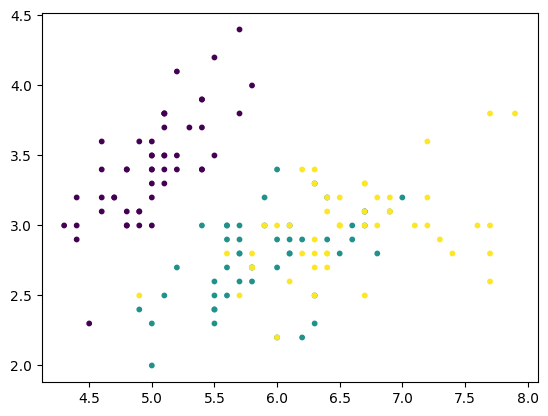

In [8]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=10,  c=df['target'])

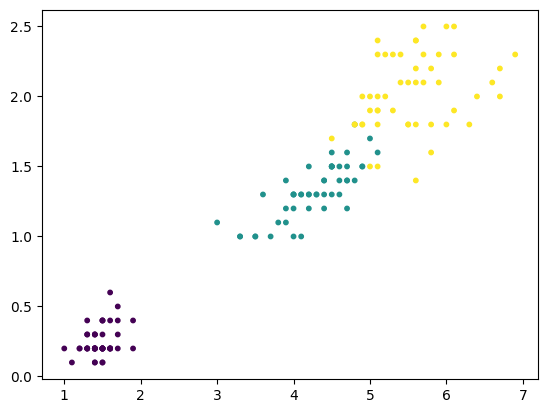

In [9]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], s=10, c=df['target'])

In [10]:
X, y = df.drop(['target', 'target names'], axis=1), df.target

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [14]:
model.score(X_test, y_test)

0.9

In [15]:
y_pred = model.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)


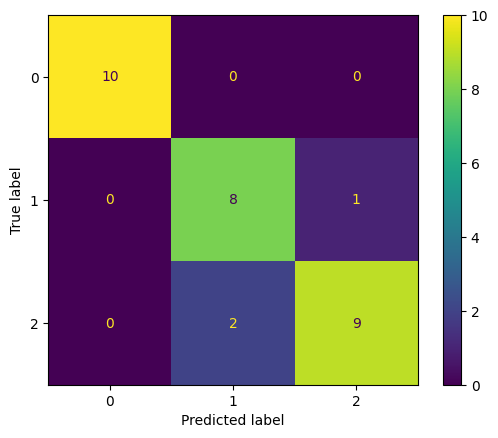

In [17]:
ConfusionMatrixDisplay(cm).plot()

In [18]:
cross_val_score(KNeighborsClassifier(n_neighbors=10),X_train, y_train, cv=5)

array([0.91666667, 0.95833333, 1.        , 1.        , 0.95833333])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

